In [100]:
#pipeline
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [5]:
df=sns.load_dataset('taxis')
df.sample(10)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.00,2.5,0.01,0.0,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens
1874,2019-03-08 23:00:22,2019-03-08 23:20:03,1,4.80,18.5,3.00,0.0,25.30,yellow,credit card,Yorkville West,Kips Bay,Manhattan,Manhattan
1594,2019-03-23 07:11:34,2019-03-23 07:15:10,1,0.80,5.0,1.65,0.0,9.95,yellow,credit card,Penn Station/Madison Sq West,Midtown Center,Manhattan,Manhattan
6145,2019-03-25 21:47:30,2019-03-25 21:55:47,1,1.68,7.5,1.76,0.0,10.56,green,credit card,Astoria,Old Astoria,Queens,Queens
3881,2019-03-28 18:34:05,2019-03-28 18:40:29,1,0.87,6.0,2.06,0.0,12.36,yellow,credit card,Upper East Side South,Lenox Hill West,Manhattan,Manhattan
3645,2019-03-29 17:46:40,2019-03-29 17:57:16,0,0.80,7.5,0.00,0.0,11.80,yellow,cash,Penn Station/Madison Sq West,Garment District,Manhattan,Manhattan
6131,2019-03-10 09:56:09,2019-03-10 10:03:05,1,1.63,7.5,2.08,0.0,10.38,green,credit card,Hamilton Heights,West Concourse,Manhattan,Bronx
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.0,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
5391,2019-03-30 11:57:22,2019-03-30 12:01:46,1,0.95,5.5,0.00,0.0,8.80,yellow,cash,Lenox Hill West,Midtown North,Manhattan,Manhattan
6093,2019-03-03 15:24:17,2019-03-03 15:55:35,1,9.60,31.5,0.00,0.0,32.30,green,credit card,East Flatbush/Remsen Village,JFK Airport,Brooklyn,Queens


In [8]:
df.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [28]:
sam=df.drop(columns=['dropoff_zone','pickup_borough','dropoff_borough','pickup_zone','pickup','dropoff','tolls','tip','passengers','payment'])

In [29]:
sam.isnull().sum()

,0
distance,0
fare,0
total,0
color,0


In [30]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   distance  6433 non-null   float64
 1   fare      6433 non-null   float64
 2   total     6433 non-null   float64
 3   color     6433 non-null   object 
dtypes: float64(3), object(1)
memory usage: 201.2+ KB


In [13]:
sam.shape

(6433, 5)

<Axes: xlabel='total'>

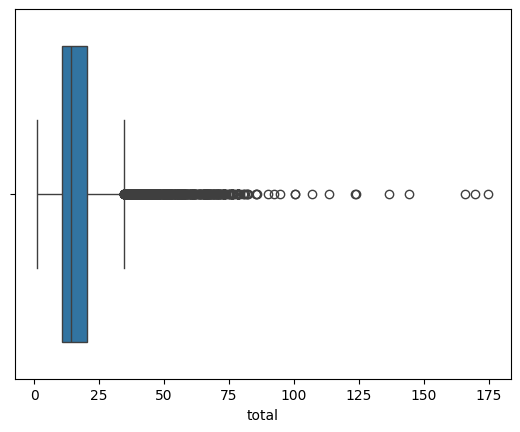

In [31]:
sns.boxplot(sam,x='total')

<Axes: xlabel='fare'>

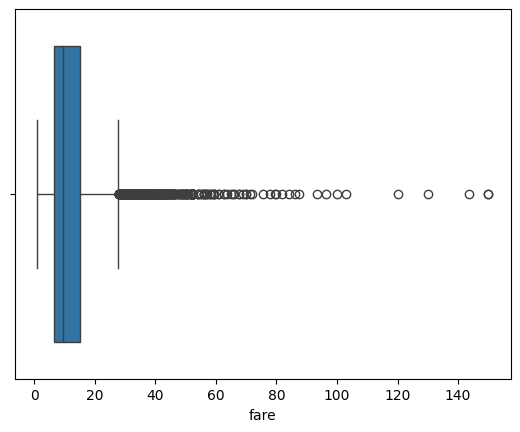

In [15]:
sns.boxplot(sam,x='fare')

<Axes: xlabel='distance'>

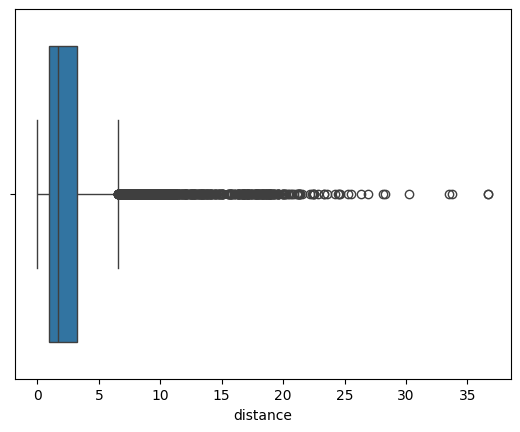

In [16]:
sns.boxplot(sam,x='distance')

In [32]:
#using iqr here to reduce the outliers
q1=sam['fare'].quantile(0.25)
q2=sam['fare'].quantile(0.75)

iqr=q2-q1

lowerbound=q1-(1.5*iqr)
upperbound=q2+(1.5*iqr)



new_sam=sam[(sam['fare']>=lowerbound) & (sam['fare']<=upperbound)]
meann=new_sam['fare'].mean()

sam.loc[(sam['fare']>=upperbound) | (sam['fare']<=lowerbound)]= meann





<Axes: xlabel='fare'>

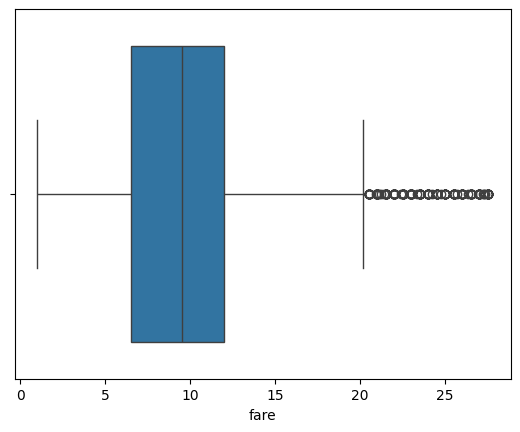

In [18]:
sns.boxplot(sam,x='fare')

In [19]:
#using iqr here to reduce the outliers
q1=sam['distance'].quantile(0.25)
q2=sam['distance'].quantile(0.75)

iqr=q2-q1

lowerbound=q1-(1.5*iqr)
upperbound=q2+(1.5*iqr)



new_sam=sam[(sam['distance']>=lowerbound) & (sam['distance']<=upperbound)]
meann=new_sam['distance'].mean()

sam.loc[(sam['distance']>=upperbound) | (sam['distance']<=lowerbound)]= meann



<Axes: xlabel='distance'>

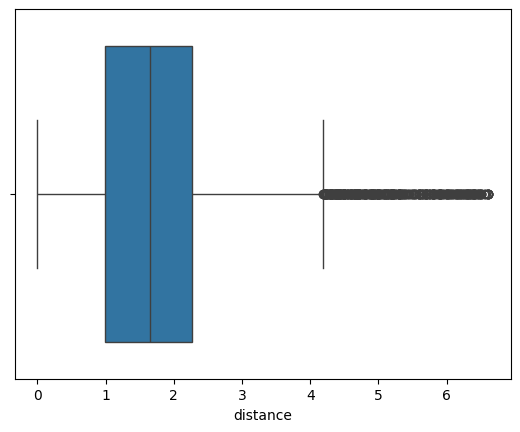

In [20]:
sns.boxplot(sam,x='distance')

In [21]:
#using iqr here to reduce the outliers
q1=sam['total'].quantile(0.25)
q2=sam['total'].quantile(0.75)

iqr=q2-q1

lowerbound=q1-(1.5*iqr)
upperbound=q2+(1.5*iqr)



new_sam=sam[(sam['total']>=lowerbound) & (sam['total']<=upperbound)]
meann=new_sam['total'].mean()

sam.loc[(sam['total']>=upperbound) | (sam['total']<=lowerbound)]= meann



<Axes: xlabel='total'>

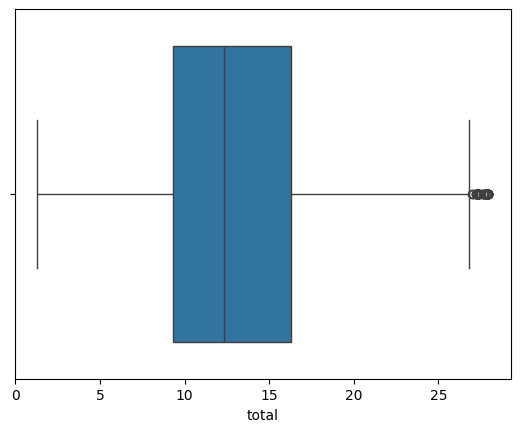

In [22]:
sns.boxplot(sam,x='total')

In [23]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   distance  6433 non-null   float64
 1   fare      6433 non-null   float64
 2   total     6433 non-null   float64
 3   color     6433 non-null   object 
 4   payment   6394 non-null   object 
dtypes: float64(3), object(2)
memory usage: 251.4+ KB


In [83]:
fea=sam.drop(columns=['total'])
tar=sam['total']

xtr,xte,ytr,yte=train_test_split(fea,tar,test_size=0.2,random_state=50)

In [44]:
[[xtr_se]]

[[array([[1.869132734003173],
         ['cash'],
         ['credit card'],
         ...,
         [1.869132734003173],
         [1.869132734003173],
         ['cash']], dtype=object)]]

In [48]:
sam['color'].unique()
sam['color'].astype('category')

,color
0,yellow
1,yellow
2,yellow
3,yellow
4,yellow
...,...
6428,green
6429,10.107261
6430,green
6431,green


In [49]:
sam['color'].unique()

array(['yellow', 10.107260743023454, 'green'], dtype=object)

In [84]:
# Convert the 'color' column to a consistent data type (string) before encoding.
xtr['color'] = xtr['color'].astype(str)
xte['color'] = xte['color'].astype(str)


In [59]:
xtr['color'].unique()

array(['10.107260743023454', 'green', 'yellow'], dtype=object)

In [85]:
# usiing column transformer

ct=ColumnTransformer(
    transformers=[
('t1',StandardScaler(),['fare','distance']),
('t2',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['color'])])

xtrain_transformmed=ct.fit_transform(xtr)
xtest_transformed=ct.fit_transform(xte)

In [90]:
pd.DataFrame(xtrain_transformmed)

,0,1,2
0,0.003696,2.556114,1.0
1,-0.513960,-0.561390,1.0
2,-0.513960,-0.634972,1.0
3,-0.116872,-0.442258,1.0
4,-0.712504,-0.677018,1.0
...,...,...,...
5141,0.003696,2.556114,1.0
5142,-1.109592,-0.722569,1.0
5143,0.003696,2.556114,1.0
5144,3.159103,1.488386,1.0


In [98]:
model=RandomForestRegressor()
model.fit(xtrain_transformmed,ytr)

accuracy_score=model.score(xtest_transformed,yte)
print("accauracy acore:",accuracy_score)

prediction=model.predict(xtest_transformed)
print(prediction)


accauracy acore: 0.8200740718436649
[19.34761667  9.93221641 14.943      ... 18.4872     16.26041263
 14.0303043 ]


In [103]:
samirspipeline=make_pipeline(ct,model)

In [104]:
samirspipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', StandardScaler(),
                                                  ['fare', 'distance']),
                                                 ('t2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['color'])])),
                ('randomforestregressor', RandomForestRegressor())])